Importing the Libraries

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas_profiling import ProfileReport

DATA COLLECTION

In [135]:
data = pd.read_csv('Diabetes_dataset.csv')

DATA ANALYSIS


In [136]:
tup = data.shape 
rows = tup[0]
columns = tup[1]
print ("Rows ",rows)
print ("Columns ",columns)

Rows  768
Columns  8


In [137]:
data.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [138]:
data.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
6,78,50,32,88,31.0,0.248,26,1
7,115,0,0,0,35.3,0.134,29,0
8,197,70,45,543,30.5,0.158,53,1
9,125,96,0,0,0.0,0.232,54,1


In [139]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot: ylabel='count'>

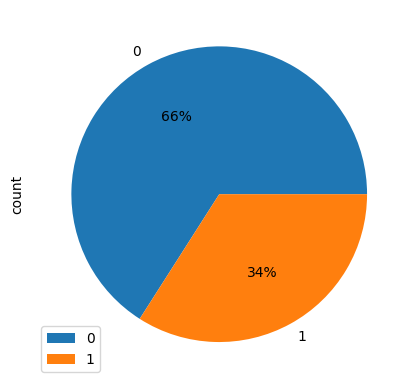

In [140]:
datafr = pd.DataFrame({'Result' : ['0','1'],'count' : [500,258]}) 
datafr.groupby(['Result']).sum().plot(kind = "pie", y = "count", autopct = "%1.0f%%")

In [174]:
L=[]
Bins=[]
for x in range(data["Age"].min(),data["Age"].max(),10):
    y=data[((data["Age"] >= x) & (data["Age"] < x+10))]["Outcome"].value_counts()
    try:
        L.append(y[1])
        Bins.append(x)
    except:
        L.append(0)
        Bins.append(x)
Bins.append(data["Age"].max())
print(L)
label=[]
for x in Bins[0:(len(Bins)-1)]:
    label.append((str(x)+"-"+str(x+10)))


[90, 76, 64, 31, 7, 0]


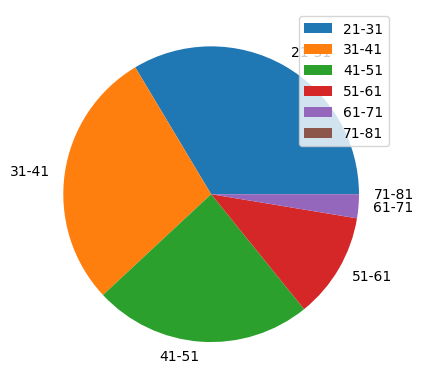

In [175]:
plt.pie(L,labels=label)
plt.legend()

In [143]:
data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [144]:
data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Splitting the data between Input and Output variables

In [145]:
input_variables = data.drop("Outcome",axis=1) # independent feature
result = data["Outcome"] # dependent feature

In [146]:
input_variables

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


DATA CLEANING

Eliminating NULL (Zero) values in the data table

In [147]:
heads = input_variables.columns
for i in heads:
    avg = input_variables[i][input_variables[i] != 0].mean()
    input_variables[i].fillna(avg)
    for j in range(768):
        if (input_variables[i][j]==0):
            input_variables[i][j] = avg

C:\Users\91953\AppData\Local\Temp\ipykernel_11708\4246052387.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_variables[i][j] = avg


In [148]:
input_variables

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [149]:
result

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [150]:
input_variables.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [151]:
newdata = pd.concat([input_variables,result],axis = 1)

In [152]:
newdata

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


DATA STANDARDIZATION / TRANSFORMATION

In [153]:
scaler = StandardScaler()

In [154]:
scaler.fit(input_variables)

StandardScaler()

In [155]:
scaled_data = scaler.transform(input_variables)

In [156]:
scaled_data

array([[ 8.65108070e-01, -3.35182392e-02,  6.65502121e-01, ...,
         1.66291742e-01,  4.68491977e-01,  1.42599540e+00],
       [-1.20616153e+00, -5.29859033e-01, -1.74633816e-02, ...,
        -8.52531177e-01, -3.65060778e-01, -1.90671905e-01],
       [ 2.01581340e+00, -6.95305964e-01,  8.08793628e-16, ...,
        -1.33283341e+00,  6.04397318e-01, -1.05584152e-01],
       ...,
       [-2.25789027e-02, -3.35182392e-02, -7.00428884e-01, ...,
        -9.10749630e-01, -6.85193357e-01, -2.75759658e-01],
       [ 1.41807574e-01, -1.02619983e+00,  8.08793628e-16, ...,
        -3.43119717e-01, -3.71101015e-01,  1.17073215e+00],
       [-9.43143171e-01, -1.98965170e-01,  2.10191786e-01, ...,
        -2.99455878e-01, -4.73785050e-01, -8.71373930e-01]])

In [157]:
newdata.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot: >

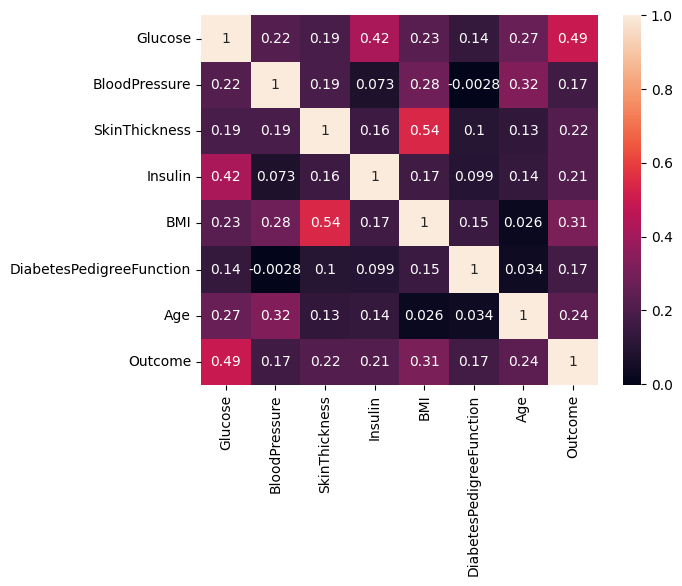

In [158]:
sb.heatmap(newdata.corr(), annot=True)

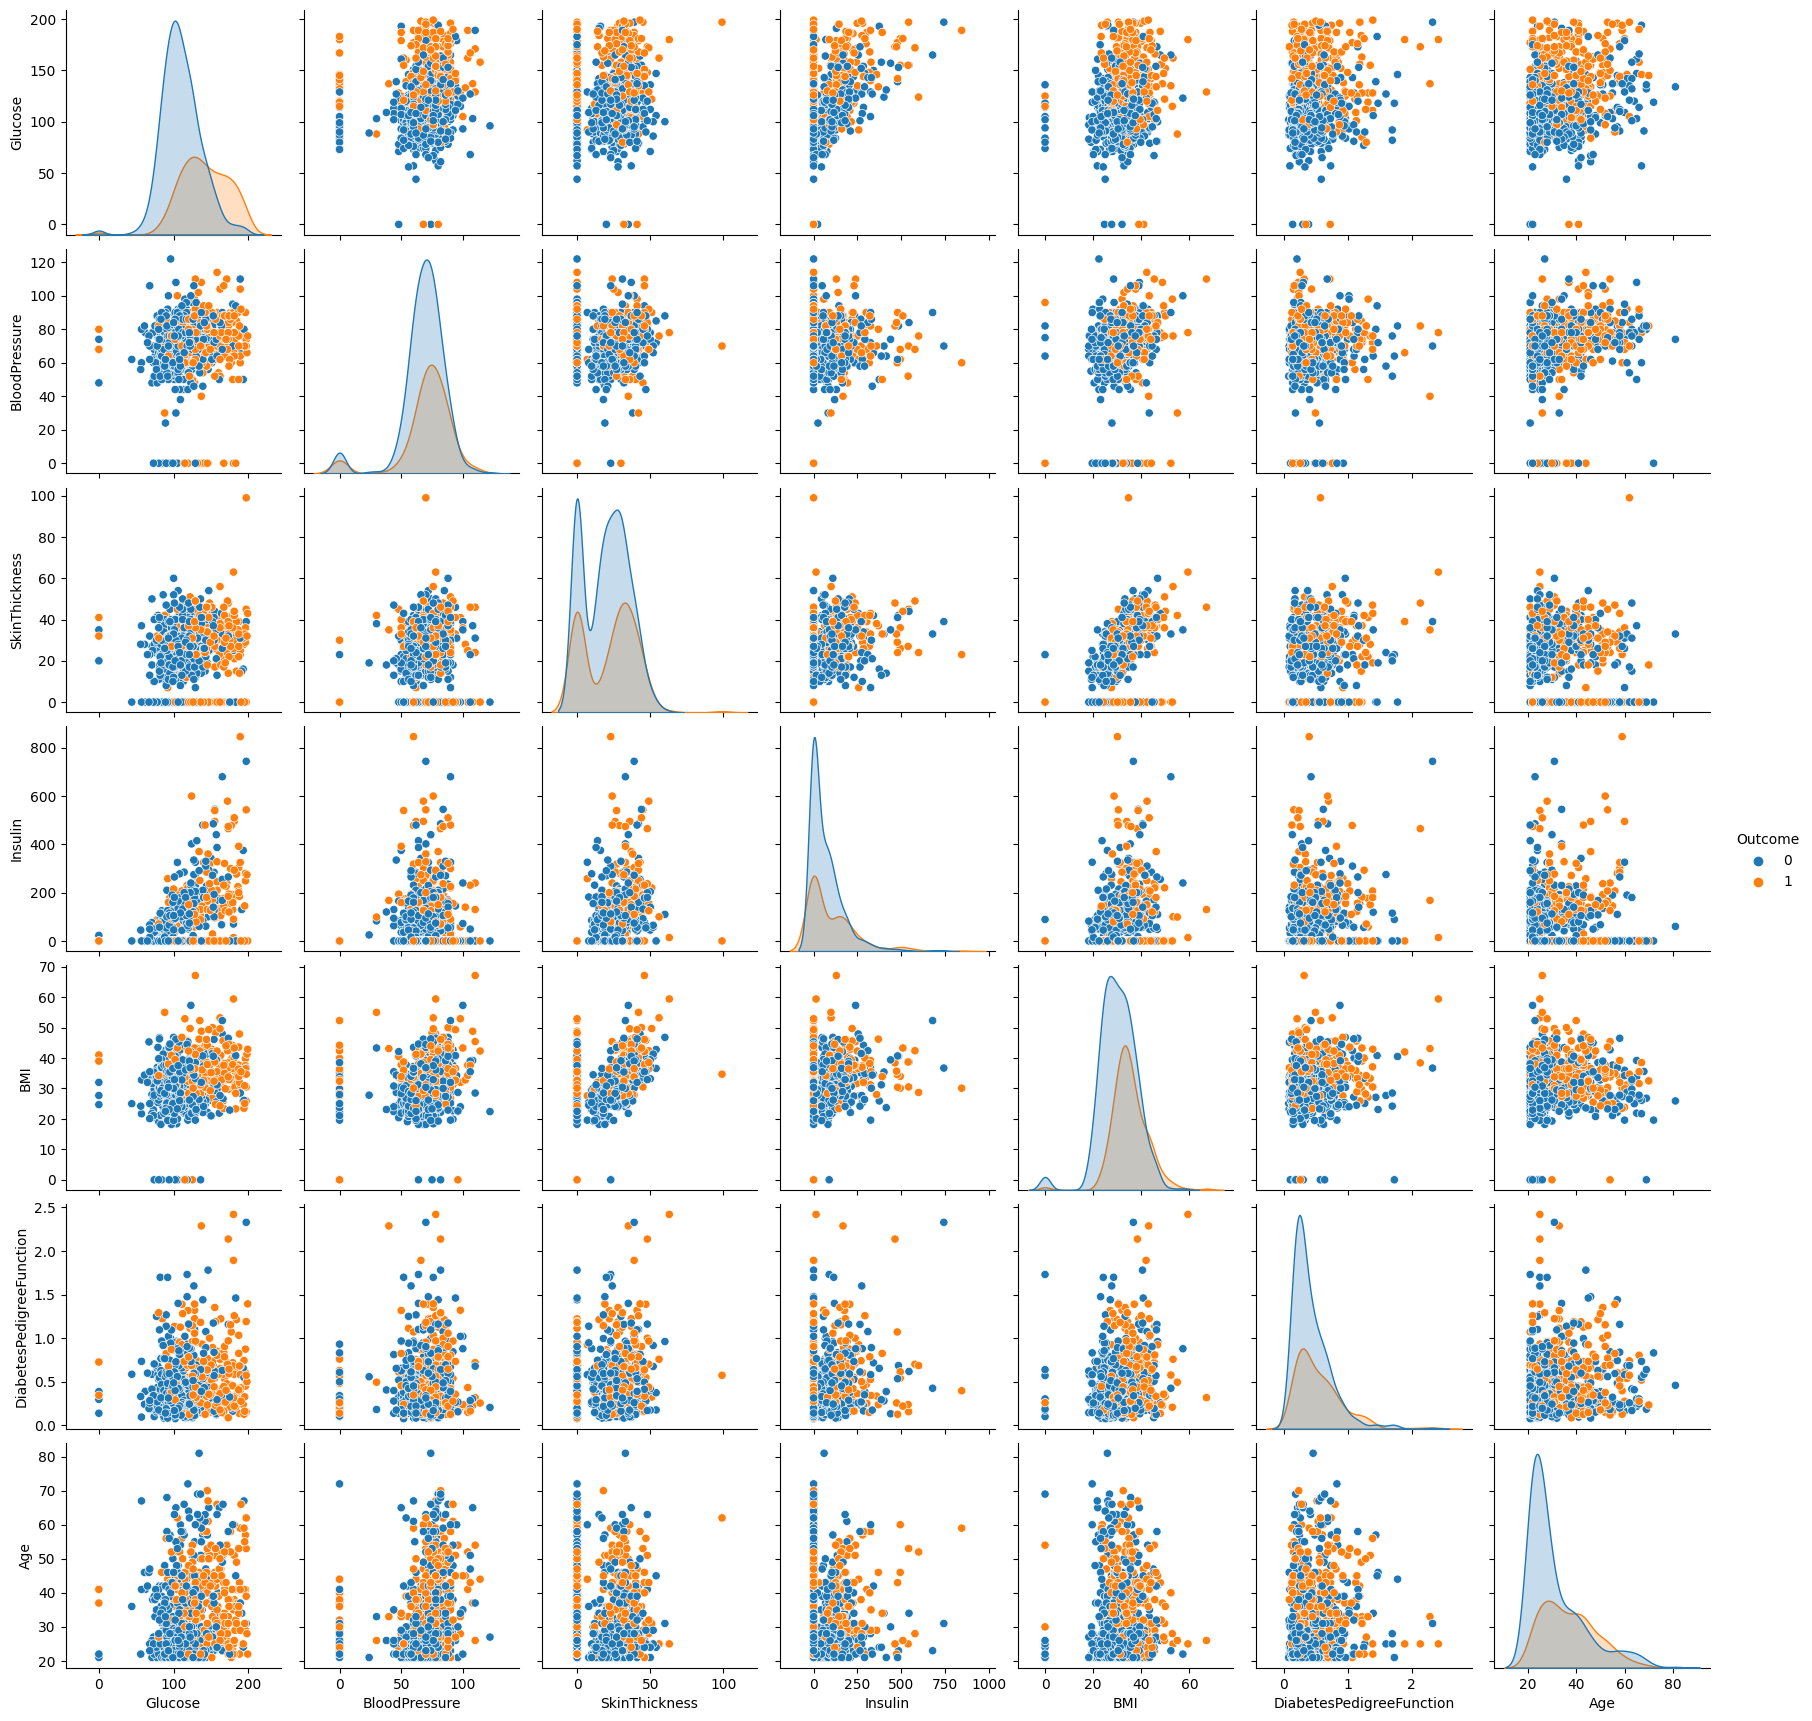

In [159]:
sb.pairplot(data, diag_kind='kde',hue = "Outcome")

Pearson's Coefficient

In [160]:
from scipy.stats import pearsonr

In [161]:
features = list(input_variables.columns)
target = "Outcome"
for i in features:
    print(i,pearsonr(data[i],data[target]))

Glucose PearsonRResult(statistic=0.4665813983068734, pvalue=8.935431645288658e-43)
BloodPressure PearsonRResult(statistic=0.06506835955033273, pvalue=0.071513900097732)
SkinThickness PearsonRResult(statistic=0.07475223191831933, pvalue=0.03834770482047633)
Insulin PearsonRResult(statistic=0.13054795488404775, pvalue=0.000286186460360213)
BMI PearsonRResult(statistic=0.29269466264444516, pvalue=1.2298074873112102e-16)
DiabetesPedigreeFunction PearsonRResult(statistic=0.1738440656529598, pvalue=1.2546070101484021e-06)
Age PearsonRResult(statistic=0.2383559830271976, pvalue=2.2099754606646917e-11)


Train Test Split

In [162]:
in_train, in_test, op_train, op_test = train_test_split(input_variables, result, test_size = 0.15, stratify = result, random_state = 2)

In [163]:
in_train.shape[0]

652

In [164]:
in_test.shape[0]

116

In [165]:
(input_variables.shape[0]) == (in_train.shape[0]+in_test.shape[0])

True

In [166]:
(result.shape[0]) == (op_train.shape[0]+op_test.shape[0])


True

Implementing Different Machine Learning Models

Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression
model_regression = LogisticRegression()
model_regression.fit(in_train,op_train)

LogisticRegression()

In [168]:
prediction = model_regression.predict(in_test)
from sklearn.metrics import classification_report
print(classification_report(op_test,prediction))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        76
           1       0.71      0.42      0.53        40

    accuracy                           0.74       116
   macro avg       0.73      0.67      0.68       116
weighted avg       0.74      0.74      0.72       116



Trying model for REAL USER DATA

In [169]:
def write_data():
    L=[]
    L.append(input("Enter the Glucose: "))
    L.append(input("Enter the BloodPressure: "))
    L.append(input("Enter the SkinThickness: "))
    L.append(input("Enter the Insulin: "))
    L.append(input("Enter the BMI: "))
    L.append(input("Enter the DiabetesPedigreeFunction: "))
    L.append(input("Enter the Age: "))
    d={}
    i=0
    user_data = pd.read_csv('user_data.csv')
    for x in user_data.columns:
        d[x]=[]
        d[x].append(L[i])
        i+=1
    df=pd.DataFrame(d)
    user_data=pd.concat((user_data,df),ignore_index=True)
    user_data.to_csv('user_data.csv',index=False)

In [170]:
write_data()

In [171]:
user_data = pd.read_csv('user_data.csv')
prediction = model_regression.predict(user_data)
# print(classification_report(user_ans,prediction))
print(type(prediction))

<class 'numpy.ndarray'>


In [172]:
if (prediction[0]==0):
    print("You are safe")
else:
    print("Sorry, you might have diabetes")

Sorry, you might have diabetes
